

# Project: Investigate a Dataset - No Show Medical Appointments.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description

This dataset shows information from 110,527 medical appointments its 14 associated variables in Brazil and is focused on the question of whether or not patients show up for their appointment based on different factors.

This dataset consists of with 14 columns as follows:
<h3>1. PatientId </h3>
    <ul>
    <li>Unique identifier for a patient</li>
    <li>Datatype-float64</li>
    </ul>
<h3>2. AppointmentID </h3>
    <ul>
    <li>Identification of each appointment</li>
    <li>Datatype-int64</li>
    </ul>
<h3>3. Gender</h3>
    <ul>
    <li>Male or Female.</li>
    <li>Datatype- String</li>
    </ul>
<h3>4. ScheduledDay </h3>
    <ul>
    <li>The day someone called or registered the appointment.</li>
    <li>Datatype-string</li> 
    </ul>
<h3>5. Appointment Day </h3>
    <ul>
    <li>The day of the actual appointment.</li>
    <li>Datatype-string</li>
    </ul>
<h3>6. Age </h3>
    <ul>
    <li>Age of the patient</li>
    <li>Datatype-int64</li>
    </ul>
<h3>7. Neighbourhood </h3>
    <ul>
    <li>Where the appointment takes place.</li>
    <li>Datatype-string</li>
    </ul>
<h3>8. Scholarship </h3>
    <ul>
    <li>Enrolled in wellfare program</li>
    <li>Datatype-int64</li>
    </ul>
<h3>9. Hipertension </h3>
    <ul>
    <li>does patient have hypertension</li>
    <li>Datatype-bool</li>
    </ul>
<h3>10. Diabetes </h3>
    <ul>
    <li>does patient have diabetes</li>
    <li>Datatype-bool</li>
    </ul>
<h3>11. Alcoholism </h3>
    <ul>
    <li>Is the patient an alcoholic</li>
    <li>Datatype-int64</li>
    </ul>
<h3>12. Handcap </h3>
    <ul>
    <li>Number of disabilities the patient has.</li>
    <li>Datatype- int</li>
    </ul>
<h3>13.SMS Recieved </h3>
    <ul>
    <li>sms reminder sent to patient</li>
    <li>Datatype-bool</li>
    </ul>
<h3>14. No Show </h3>
    <ul>
    <li>Did the Patient show up ? yes-no show, No- showed up</li>
    <li>Datatype-string</li>
    </ul>








In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
% matplotlib inline
sns.set_style('darkgrid')

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df= pd.read_csv('Database_No_show_appointments/no_show_2016.csv')

In [4]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


<em>From the info above it is clear that there are no missing values for all the columns </em>

In [6]:
df.shape

(110527, 14)


### Data Cleaning


In [7]:
#check for null values
df.isnull().any()

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

In [8]:
#check for duplicates.
df.duplicated().any()

False

In [9]:
#view columns in dataframe
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [10]:
#change all column names to lower case and strip whitespace if necessary.
df.rename(columns=lambda x: x.strip().lower(), inplace=True)

In [11]:
#checking if the changes have been implemented
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no-show'],
      dtype='object')

In [12]:
#giving column appropriate names
df.rename(columns={'patientid':'patient_id', 
                   'appointmentid':'appointment_id',
                  'scheduledday':'scheduled_day',
                  'appointmentday':'appointment_day',
                  'hipertension':'hypertension', 
                  'handcap':'handicap',
                  'no-show':'patient_show_up'}, inplace=True)

In [13]:
df.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received',
       'patient_show_up'],
      dtype='object')

In [14]:
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,patient_show_up
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<em> <h4>Reversing the patient_show_up column to reflect:</h4></em>
<ul>
    <li>yes-Present </li>
    <li>no- Not present </li>


In [15]:
df.patient_show_up.unique()

array(['No', 'Yes'], dtype=object)

In [16]:
#Reversing the variables
df["patient_show_up"].replace({"Yes":'no',"No":'yes'},inplace=True)

In [17]:
df.patient_show_up.unique()

array(['yes', 'no'], dtype=object)

In [18]:
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,patient_show_up
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,yes
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,yes
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,yes
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,yes
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,yes


<em> <h4>Converting columns to appropriate datatypes.</h4></em>

In [19]:
#converting patient_show up column to bool

df['patient_show_up'] = df['patient_show_up'].map({'yes': True, 'no': False})

In [20]:
df.patient_show_up.unique()

array([ True, False], dtype=bool)

In [21]:
#converting the patient_id column to type int.

df['patient_id'] = df['patient_id'].astype(int)

In [22]:
#converting ['scheduled_day','appointment_day'] to datetime.

datetime_var=np.array(['scheduled_day',
       'appointment_day'])
def change_datatype(data):
    df[data] = pd.to_datetime(df[data])
datetime_changes=[change_datatype(i) for i in datetime_var]

In [23]:
#check if the changes have been implemented
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patient_id         110527 non-null int64
appointment_id     110527 non-null int64
gender             110527 non-null object
scheduled_day      110527 non-null datetime64[ns]
appointment_day    110527 non-null datetime64[ns]
age                110527 non-null int64
neighbourhood      110527 non-null object
scholarship        110527 non-null int64
hypertension       110527 non-null int64
diabetes           110527 non-null int64
alcoholism         110527 non-null int64
handicap           110527 non-null int64
sms_received       110527 non-null int64
patient_show_up    110527 non-null bool
dtypes: bool(1), datetime64[ns](2), int64(9), object(2)
memory usage: 11.1+ MB


In [24]:
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,patient_show_up
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,True
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,True
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,True
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,True
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,True


In [25]:
#summary of the data set
df.describe()

,patient_id,appointment_id,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921700e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


<em> <h4>The Age Summary indicates that there is/are negative value(s) for Age. </h4></em>

In [26]:
#Query the Age column for negative and zero values for Age.
df.query('age<=0')['age'].count()

3540

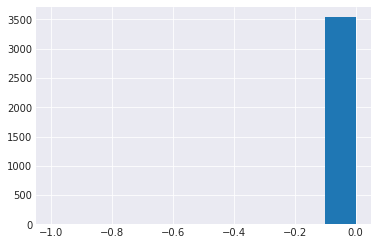

In [27]:
#distribution of the irregular age data
df.query('age<=0')['age'].hist()

<em><h4>- Removing Negative/Zero Age values.</h4></em>

In [28]:
#selecting all age values greater than zero.
df=df.query('age>0')

In [29]:
df.shape

(106987, 14)

In [30]:
#check if the changes have been implemented
df.query('age<=0')['age'].count()

0

#### Creating Bins for the age column.

1. Create age groups. Using the age categories from [here](www.statcan.gc.ca/en/concepts/definitions/age2)
  - 0-14  --***Children***
  - 14-24 -- ***Youth***
  - 25-64 -- ***Adult***
  - 65 and above -- ***Senior***

In [31]:
#select bin edges according to age grouping
bin_edges=[1,14,24,64,115]

In [32]:
#set bin names
bin_names=['children', 'youth', 'adult','senior']

In [33]:
#create bins
df['age_group'] = pd.cut(df['age'], bin_edges, labels=bin_names)

In [34]:
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,patient_show_up,age_group
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,True,adult
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,True,adult
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,True,adult
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,True,children
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,True,adult


### Data Cleaning Section.
 1. Check and clean null values if any.
 2. change column names to lower case and strip white space where necessary.
 3. Renaming columns
 4. Reversing the patient show up values.
 5. converting columns to appropriate data types.
 6. removing negative and zero values from the age column.
 

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 : Which has more effect on show up rate. Appointments during Weekdays Or Weekends ? 

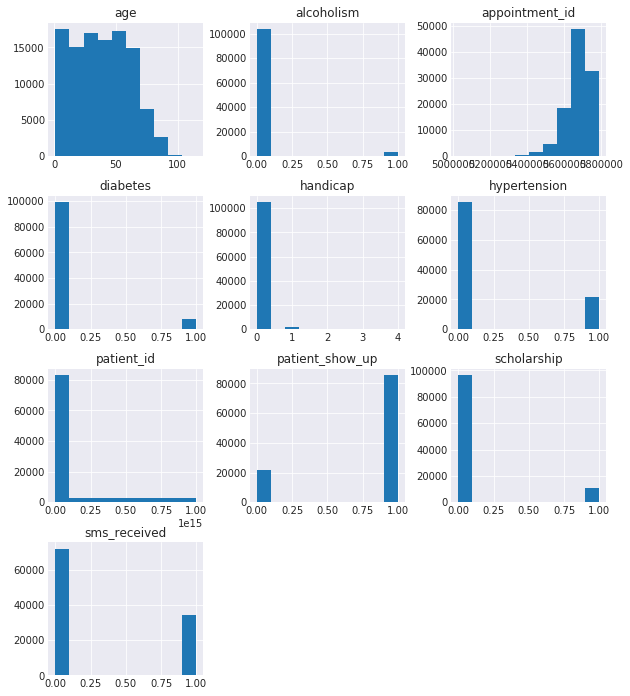

In [35]:
#view the distribution of all columns
df.hist(figsize=(10,12));

In [36]:
from calendar import day_name

In [37]:
#Creating Day of the week column
df['appointment_weekday']=df.appointment_day.dt.day_name()

In [38]:
#converting day of the week column to a categorical variable so it can be sorted.
df['appointment_weekday'] = pd.Categorical(df['appointment_weekday'], categories=day_name, ordered=True)

df = df.sort_values('appointment_weekday')


In [39]:
df['appointment_weekday'].unique()

[Monday, Tuesday, Wednesday, Thursday, Friday, Saturday]
Categories (6, object): [Monday < Tuesday < Wednesday < Thursday < Friday < Saturday]

In [40]:
#Distribution of weekday data 
weekday=df.groupby('appointment_weekday').count()['age']
weekday

appointment_weekday
Monday       21903
Tuesday      24831
Wednesday    25090
Thursday     16659
Friday       18465
Saturday        39
Sunday           0
Name: age, dtype: int64

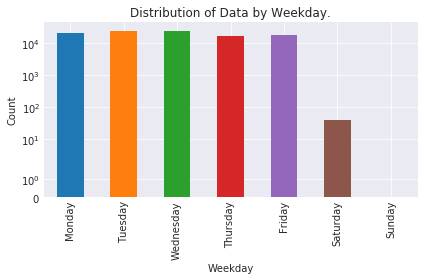

In [41]:
#Plotting the Distribution of data per day using Symlog scale to show values for saturday
weekday.plot(kind='bar')
plt.yscale('symlog')
plt.ylabel('Count')
plt.xlabel('Weekday')
plt.title('Distribution of Data by Weekday.')
plt.tight_layout()
plt.show()

In [42]:
#Relationship between weekday and showup rate in proportion
weekday_proportion=df.groupby(['appointment_weekday','patient_show_up']).age.count()/df.groupby(['appointment_weekday']).age.count()
weekday_proportion

appointment_weekday  patient_show_up
Monday               False              0.206136
                     True               0.793864
Tuesday              False              0.202328
                     True               0.797672
Wednesday            False              0.197210
                     True               0.802790
Thursday             False              0.194730
                     True               0.805270
Friday               False              0.213377
                     True               0.786623
Saturday             False              0.230769
                     True               0.769231
Name: age, dtype: float64

In [43]:
#plt.figure(figsize=(10,6))
#ind=np.arange(len(weekday_proportion))
#red_bars= plt.bar(ind, weekday_proportion, color=['r','b'],alpha=.7)
#labels= ['monday','tuesday','wednesday', 'thursday', 'friday', 'saturday']
#plt.xticks([0.5, 2.5, 4.5, 6.5, 8.5, 10.5], labels)
#colors = {'Not_Present':'red', 'Present':'blue'}         
#labeling = list(colors.keys())
#handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labeling]
#plt.ylabel('Proportion')
#plt.xlabel('Weekday')
#plt.title('Proportion of Weekday Appointments by Show Up Categories.')
#plt.legend(handles, labeling)


In [44]:
#convert series to a dataframe
weekday_proportion=weekday_proportion.unstack()

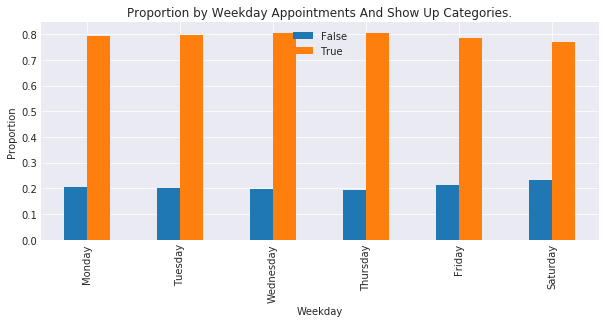

In [45]:
#plotting the bar chart
weekday_proportion.plot(kind='bar', grid=True, figsize=(10,4))
plt.ylabel('Proportion')
plt.xlabel('Weekday')
plt.title('Proportion by Weekday Appointments And Show Up Categories.')
plt.legend(loc='upper center');

### Research Question 2 : What is the relationship between different age category and Patient show up.

### Relationship between age category and show up rate

  

In [46]:
#check 5 number summary of the age data
df.age.describe()

count    106987.000000
mean         38.316085
std          22.466214
min           1.000000
25%          19.000000
50%          38.000000
75%          56.000000
max         115.000000
Name: age, dtype: float64

### Exploratory Analysis for the age group column.

In [47]:
#check age distribution
age_distr= df.age_group.value_counts()
age_distr

adult       58857
children    17445
senior      14402
youth       14010
Name: age_group, dtype: int64

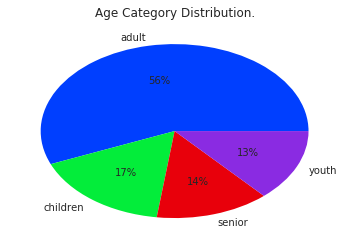

In [48]:
colors = sns.color_palette('bright') #set plot colors for uniformity
#plot pie chart
plt.pie(age_distr.values, labels=age_distr.index, colors=colors,autopct='%.0f%%')
plt.title('Age Category Distribution.')
plt.show()

In [49]:
#Grouping gender and age group
age_by_gender=df.groupby(['age_group','gender']).count()['age']
age_by_gender

age_group  gender
children   F          8390
           M          9055
youth      F          9964
           M          4046
adult      F         40965
           M         17892
senior     F          9711
           M          4691
Name: age, dtype: int64

In [50]:
#convert age_by_gender series to a dataframe
age_by_gender=age_by_gender.unstack()

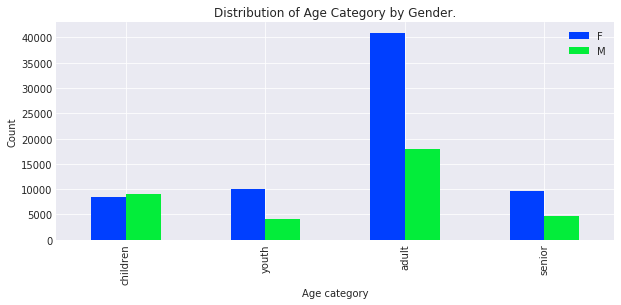

In [51]:
age_by_gender.plot(kind='bar', grid=True, figsize=(10,4), color=colors)
plt.ylabel('Count')
plt.xlabel('Age category')
plt.title('Distribution of Age Category by Gender.')
plt.legend(loc='upper right');

### Proportion of Age Category by Patient Show up.

In [52]:
#proportion of age category and patient show up.
df1=df.groupby(['age_group','patient_show_up']).count()['age']/df.groupby('age_group').count()['age']
df1

age_group  patient_show_up
children   False              0.221955
           True               0.778045
youth      False              0.252677
           True               0.747323
adult      False              0.197428
           True               0.802572
senior     False              0.155048
           True               0.844952
Name: age, dtype: float64

In [53]:
#converting pandas series to a dataframe
df1=df1.unstack()
df1

patient_show_up,False,True
age_group,,
children,0.221955,0.778045
youth,0.252677,0.747323
adult,0.197428,0.802572
senior,0.155048,0.844952


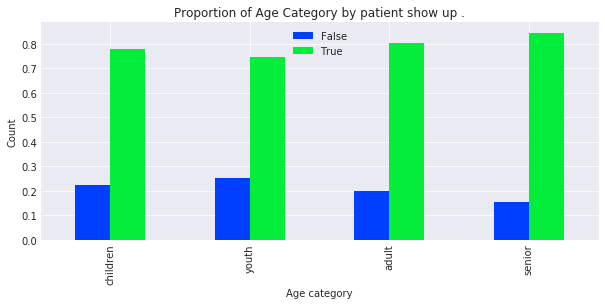

In [54]:
#plotting the chart
df1.plot(kind='bar', grid=True, figsize=(10,4), color=colors)
plt.ylabel('Count')
plt.xlabel('Age category')
plt.title('Proportion of Age Category by patient show up .')
plt.legend(loc='upper center');

### Research Question 3 : What is the relationship between the different age categories and Hypertension ?

In [55]:
#converting the hypertension column to boolean
df['hypertension']= df.hypertension.astype('bool')

In [56]:
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,patient_show_up,age_group,appointment_weekday
55395,452338982916,5647303,F,2016-05-02 13:20:55,2016-05-02,65,MARUÍPE,1,False,0,0,0,0,True,senior,Monday
65603,78571732158226,5644376,F,2016-05-02 08:36:18,2016-05-02,21,TABUAZEIRO,0,False,0,0,0,0,True,youth,Monday
65604,447611757616,5742610,F,2016-05-30 08:10:11,2016-05-30,2,TABUAZEIRO,1,False,0,0,0,0,True,children,Monday
65605,6974857388999,5644516,F,2016-05-02 08:46:25,2016-05-02,7,TABUAZEIRO,1,False,0,0,0,0,True,children,Monday
65606,4292325664933,5698245,F,2016-05-16 07:24:14,2016-05-16,50,MARUÍPE,0,True,0,0,0,0,True,adult,Monday


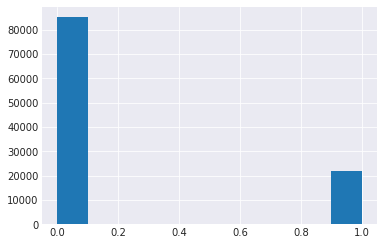

In [57]:
#checking the distribution
df.hypertension.hist();

In [58]:
#hypertension by gender grouping
gender_hyper=df.groupby(['gender','hypertension']).count()['age']/df.groupby('gender').count()['age']
gender_hyper
                                                                                               

gender  hypertension
F       False           0.781240
        True            0.218760
M       False           0.824731
        True            0.175269
Name: age, dtype: float64

In [59]:
#Convert series to dataframe
gender_hyper=gender_hyper.unstack()

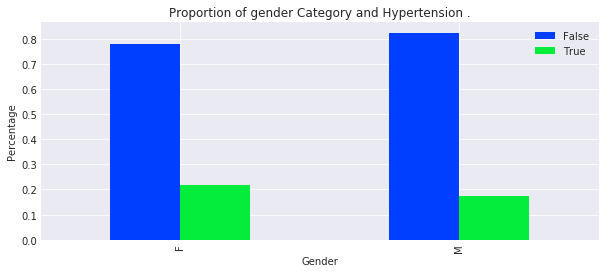

In [60]:
#plotting the chart
gender_hyper.plot(kind='bar', grid=True, figsize=(10,4), color=colors)
plt.ylabel('Percentage')
plt.xlabel('Gender')
plt.title('Proportion of gender Category and Hypertension .')
plt.legend(loc='upper right');

In [61]:
#proportion of age group with or without hypertension.
df_hypertension=df.groupby(['age_group','hypertension']).count()['age']/df.groupby('age_group').count()['age']
df_hypertension

age_group  hypertension
children   False           0.998854
           True            0.001146
youth      False           0.994290
           True            0.005710
adult      False           0.776339
           True            0.223661
senior     False           0.407235
           True            0.592765
Name: age, dtype: float64

In [62]:
#convert series to dataframe
df_hypertension= df_hypertension.unstack()

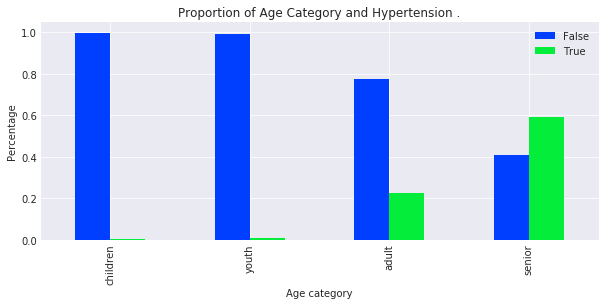

In [63]:
#plotting bar chart
df_hypertension.plot(kind='bar', grid=True, figsize=(10,4), color=colors)
plt.ylabel('Percentage')
plt.xlabel('Age category')
plt.title('Proportion of Age Category and Hypertension .')
plt.legend(loc='upper right');

<a id='conclusions'></a>
## Conclusions
### Research Question 1 : Which has more effect on Patient show up ? Appointments during Weekdays Or Weekends. 
1. The Barchart above shows that there is no significant difference between weekday and weekends. However show up for Weekday apointments is slightly better.
2. saturday has the lowest number of appointments.

### Research Question 2 : What is the relationship between different age category and Patient show up ?
1. The Barplot above shows that Older people tend to have better show up rate from the given data. 
2. The show up rate for children is slightly better than that of youths.
3. There are more adults than other age categories.
4. There are more females than males.

### Research Question 3 : What is the relationship between the different age categories and Hypertension ?
1. From the data given it is observed that there are more female hypertensive patients than males.
2. The Barchart shows that older people are more prone to Hypertension.

### Limitations.
1. The statistics used here was basically descriptive statistics and not inferential so we can't make conclusions about the general population.
2. Most of the variables were categorical so we can't show correlation between variables.

In [64]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0